In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [21]:
ori_df = pd.read_csv("IBM-HR.csv")
df = ori_df

In [22]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [ ]:
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data

In [40]:
X = data.drop('Attrition', axis=1)
y = data.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [61]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)
def feature_imp_LR(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.coef_[0]
    return fi.sort_values(by="importance", ascending=False)

In [41]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [62]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.935022    0.884298  0.929057     0.909660      0.926839
recall       0.983778    0.644578  0.929057     0.814178      0.929057
f1-score     0.958780    0.745645  0.929057     0.852212      0.924397
support    863.000000  166.000000  0.929057  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.890026   0.560000  0.852608    0.725013      0.836892
recall       0.940541   0.394366  0.852608    0.667453      0.852608
f1-score     0.914586   0.462810  0.852608    0.688698      0.841851
support    370.000000  71.000000  0.852608  441.000000    441.000000


Text(0.5, 1.0, 'Feature Importance according to Logistic Regression')

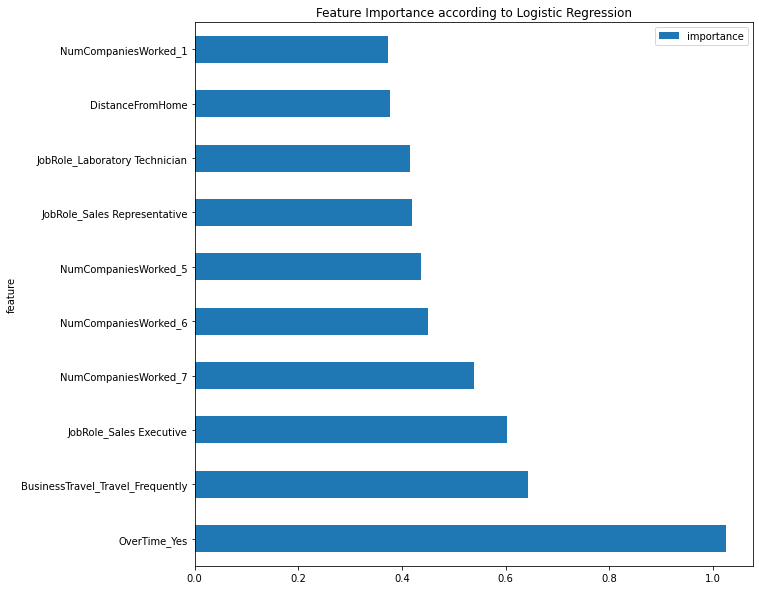

In [64]:
df = feature_imp_LR(X, lr_clf)[:10]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Logistic Regression')

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 62   9]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853428   0.500000  0.839002    0.676714      0.796527
recall       0.975676   0.126761  0.839002    0.551218      0.839002
f1-score     0.910467   0.202247  0.839002    0.556357      0.796445
support    370.000000  71.000000  0.839002  441.000000    441.000000


Text(0.5, 1.0, 'Feature Importance according to Random Forest')

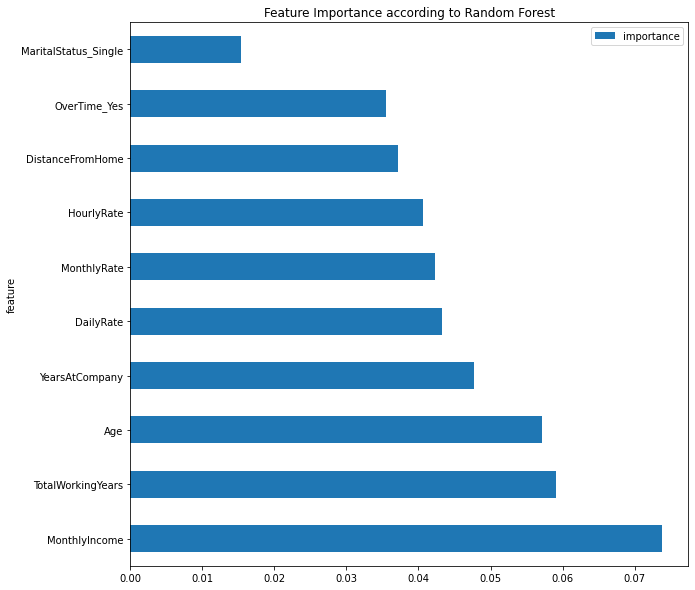

In [58]:
df = feature_imp(X, rf_clf)[:10]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

In [55]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 61 105]]
ACCURACY SCORE:
0.9407
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.933983    1.000000  0.940719     0.966991      0.944633
recall       1.000000    0.632530  0.940719     0.816265      0.940719
f1-score     0.965865    0.774908  0.940719     0.870386      0.935059
support    863.000000  166.000000  0.940719  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[358  12]
 [ 52  19]]
ACCURACY SCORE:
0.8549
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.873171   0.612903  0.854875    0.743037      0.831268
recall       0.967568   0.267606  0.854875    0.617587      0.854875
f1-score     0.917949   0.372549  0.854875    0.645249      0.830141
support    370.000000  71.000000  0.854875  441.000000    441.000000


Text(0.5, 1.0, 'Feature Importance according to XGBoost')

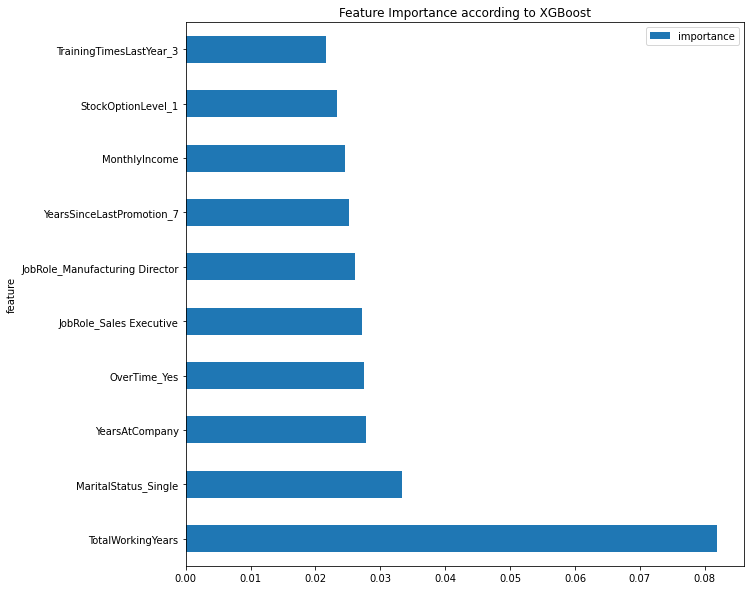

In [59]:
df = feature_imp(X, xgb_clf)[:10]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to XGBoost')

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
evaluate(dt_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[322  48]
 [ 53  18]]
ACCURACY SCORE:
0.7710
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.858667   0.272727  0.770975    0.565697      0.764332
recall       0.870270   0.253521  0.770975    0.561896      0.770975
f1-score     0.864430   0.262774  0.770975    0.563602      0.767564
support    370.000000  71.000000  0.770975  441.000000    441.000000


Text(0.5, 1.0, 'Feature Importance according to Decision Tree')

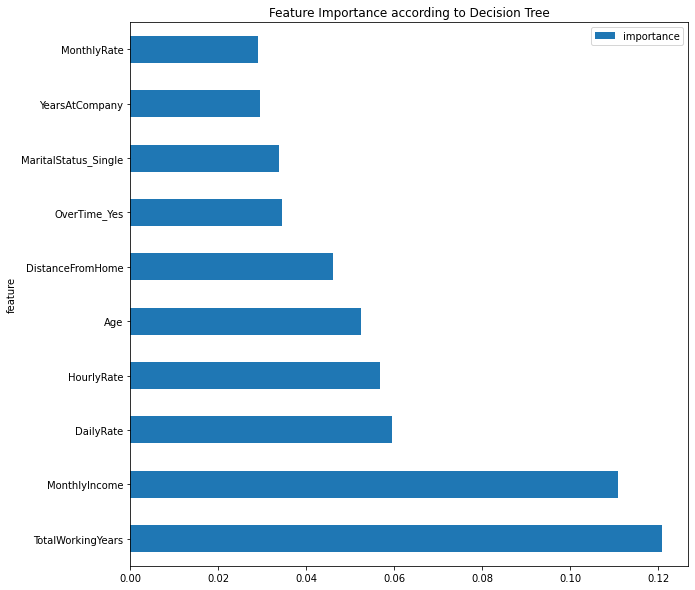

In [60]:
df = feature_imp(X, dt_clf)[:10]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Decision Tree')

Highlights:
1. Goal: Predict employee attrition and identify factors that have the most influence on employee attrition

2. Progress:
- Turned categorical features into dummy variables
- Tried predicting employee attrition using 4 models: Logistic Regression, XGBoost, Random Forest, Decision Tree. Showed each model's results including precision, recall, f1-score, and features importance
- Among the top 10 features that influence employee attrition, the most commonly mentioned features are total working years, age, years at the company, salary & income related factors (i.e. monthly income, hourly/daily/monthly rate), whether the employee works overtime, etc.